In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.preprocessing import OrdinalEncoder
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import chi2_contingency
#pd.set_option('display.max_rows', None)
%run functions.ipynb

In [2]:
print(display())

csv file reading--> read_csv(filename)
column name standardization --> col_standard(columns)
splitting data into categorical and numerical --> data_split(data)
Null value counts for each column--> null_counts(data)
Droping null values. Call this function only needed --> drop_null(data)
column Droping --> col_drop(data,columnName)
None


In [3]:
data = read_csv('regression_data_clean.csv')

In [4]:
data.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
#data.drop_duplicates()


In [6]:
data['bedrooms'] = data['bedrooms'].astype(str)

In [7]:
data['bedrooms'].dtype

dtype('O')

In [8]:
data['waterfront'] = data['waterfront'].astype(str)

In [9]:
data['view'] = data['view'].astype(str)

In [10]:
data['floors'] = data['floors'].astype(str)

In [11]:
data['condition'] = data['condition'].astype(str)

In [12]:
data['grade'] = data['grade'].astype(str)

In [13]:
data['bathrooms'] = data['bathrooms'].astype(str)

In [14]:
data = col_drop(data,['id'])

In [15]:
data = col_drop(data,['date'])

In [16]:
data['zipcode'] = data['zipcode'].astype(str)

In [17]:
data['bathrooms'].value_counts()

2.5     5377
1.0     3851
1.75    3048
2.25    2047
2.0     1930
1.5     1445
2.75    1185
3.0      753
3.5      731
3.25     589
3.75     155
4.0      136
4.5      100
4.25      79
0.75      71
4.75      23
5.0       21
5.25      13
5.5       10
1.25       9
6.0        6
5.75       4
0.5        4
6.75       2
8.0        2
6.5        2
6.25       2
7.5        1
7.75       1
Name: bathrooms, dtype: int64

In [18]:
iqr = np.percentile(data['sqft_lot'],75) - np.percentile(data['sqft_lot'],25)
upper_limit = np.percentile(data['sqft_lot'],75) + 3*iqr
lower_limit = np.percentile(data['sqft_lot'],25) - 3*iqr
data = data[(data['sqft_lot']>lower_limit) & (data['sqft_lot']<upper_limit)]
data.shape

(19828, 19)

In [19]:
X_num,X_cat = data_split(data)

In [20]:
#for val in X_num.columns:
  #  distribution_plot(X_num,val)

In [21]:
#for val in X_num.columns:
#    sns.distplot(X_num[val])
#    plt.show()

In [22]:
my_list = ['yr_built', 'yr_renovated','lat','long','price','sqft_living', 'sqft_lot15','sqft_lot']
my_list1 = my_difference(X_num.columns,my_list)
print(my_list1)

['sqft_above', 'sqft_basement', 'sqft_living15']


In [23]:
for val in my_list1:
    X_num[val] = X_num[val].apply(lambda x: np.log(x) if(x>0) else x)
    #sns.displot(X_num[val])


In [24]:
#power = PowerTransformer(method='yeo-johnson', standardize=True)
#data_trans = power.fit_transform(X_num['lat'].values.reshape(-1,1))
#data_trans = [item[0] for item in data_trans]
#X_num['lat'] = data_trans
#data_trans1 = power.fit_transform(X_num['yr_built'].values.reshape(-1,1))
#data_trans1 = [item[0] for item in data_trans1]
#X_num['yr_built'] = data_trans1

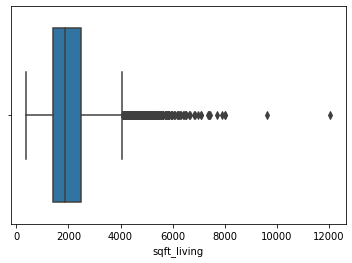

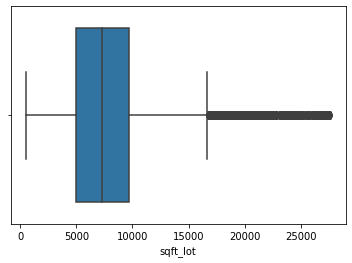

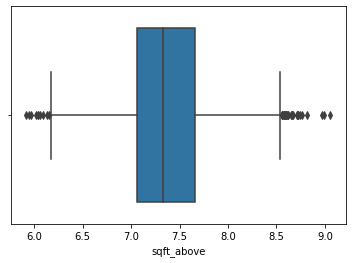

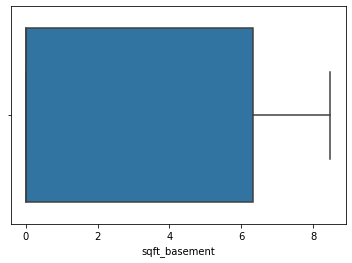

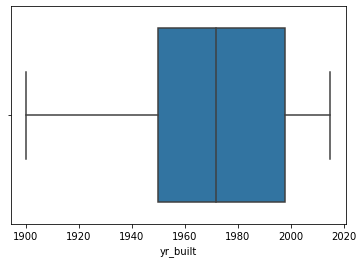

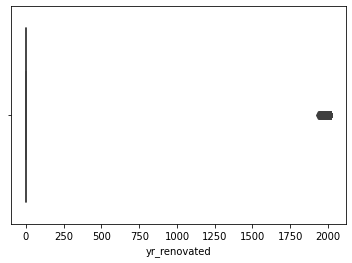

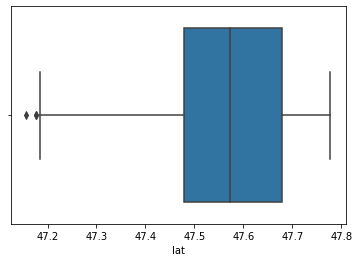

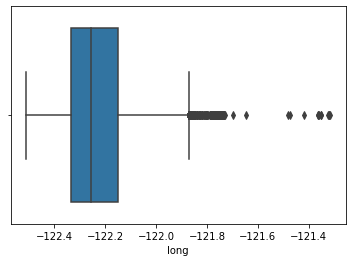

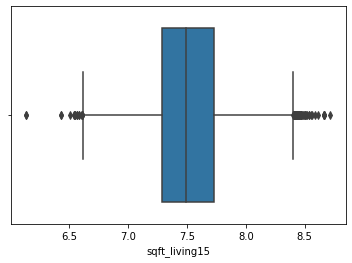

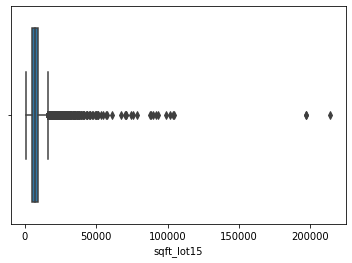

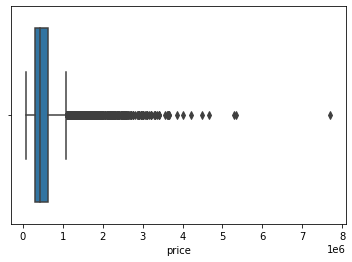

In [25]:
for val in X_num.columns:
    sns.boxplot(X_num[val])
    plt.show()

In [26]:
#my_heatMap(X_num,X_num.columns)

In [27]:
#col = ['sqft_lot15','sqft_above','sqft_living15']
#X_num = col_drop(X_num,col)

In [28]:
#X_num = VIF(X_num)
#X_num.head(5)

In [29]:
for val in X_cat.columns:
    print(X_cat[val].unique())

['3' '2' '4' '5' '1' '6' '7' '8' '9' '11' '10' '33']
['1.0' '2.25' '3.0' '2.0' '1.5' '2.5' '1.75' '2.75' '3.25' '3.5' '0.75'
 '5.0' '4.5' '4.25' '3.75' '4.0' '1.25' '6.0' '0.5' '5.25' '4.75' '5.5'
 '8.0' '6.75' '7.5' '5.75' '6.25' '6.5']
['1.0' '2.0' '1.5' '3.0' '2.5' '3.5']
['0' '1']
['0' '3' '4' '2' '1']
['3' '5' '4' '2' '1']
['7' '6' '8' '9' '10' '12' '5' '11' '4' '3' '13']
['98178' '98125' '98028' '98136' '98074' '98003' '98198' '98146' '98038'
 '98007' '98115' '98107' '98126' '98019' '98103' '98002' '98133' '98092'
 '98030' '98119' '98112' '98052' '98027' '98117' '98058' '98001' '98056'
 '98166' '98053' '98023' '98148' '98105' '98042' '98008' '98059' '98122'
 '98144' '98004' '98034' '98116' '98118' '98199' '98040' '98032' '98102'
 '98108' '98168' '98177' '98065' '98029' '98006' '98109' '98022' '98075'
 '98033' '98155' '98011' '98031' '98024' '98106' '98045' '98070' '98072'
 '98188' '98005' '98014' '98077' '98055' '98010' '98039']


In [30]:
X_num.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [31]:
X_num['lat'].unique()

array([47.5112, 47.721 , 47.7379, ..., 47.3906, 47.3339, 47.6502])

In [32]:
def renovation(x):
    if x == 0:
        x = 'not renovated'
        return x
    else:
          x = 'renovated'
    return x

In [33]:
X_num['yr_renovated']= X_num['yr_renovated'].apply(renovation)

In [34]:
X_cat['yr_renovated']= X_num['yr_renovated']

In [35]:
X_cat.head(5)

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,yr_renovated
0,3,1.0,1.0,0,0,3,7,98178,not renovated
1,3,2.25,2.0,0,0,3,7,98125,renovated
2,2,1.0,1.0,0,0,3,6,98028,not renovated
3,4,3.0,1.0,0,0,5,7,98136,not renovated
4,3,2.0,1.0,0,0,3,8,98074,not renovated


In [36]:
X_num = X_num.drop(['yr_renovated'], axis = 1)

In [37]:
X_num.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [38]:
X_num.head(5)


,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,price
0,1180,5650,7.073270,0.000000,1955,47.5112,-122.257,7.200425,5650,221900
1,2570,7242,7.682482,5.991465,1951,47.7210,-122.319,7.432484,7639,538000
2,770,10000,6.646391,0.000000,1933,47.7379,-122.233,7.908387,8062,180000
3,1960,5000,6.956545,6.813445,1965,47.5208,-122.393,7.215240,5000,604000
4,1680,8080,7.426549,0.000000,1987,47.6168,-122.045,7.495542,7503,510000


In [39]:
X_cat.head(5)

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,yr_renovated
0,3,1.0,1.0,0,0,3,7,98178,not renovated
1,3,2.25,2.0,0,0,3,7,98125,renovated
2,2,1.0,1.0,0,0,3,6,98028,not renovated
3,4,3.0,1.0,0,0,5,7,98136,not renovated
4,3,2.0,1.0,0,0,3,8,98074,not renovated


In [40]:
#X_cat = X_cat.drop(['zipcode'], axis = 1)

In [41]:
X_cat.head(5)

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,yr_renovated
0,3,1.0,1.0,0,0,3,7,98178,not renovated
1,3,2.25,2.0,0,0,3,7,98125,renovated
2,2,1.0,1.0,0,0,3,6,98028,not renovated
3,4,3.0,1.0,0,0,5,7,98136,not renovated
4,3,2.0,1.0,0,0,3,8,98074,not renovated


In [42]:
#lis = []
#for i in range((X_cat.shape[1]) - 1):
#    lis.append([])
#    for j in range(i+1, X_cat.shape[1]):
#        data_crosstab = pd.crosstab(X_cat.iloc[:,i], X_cat.iloc[:,j] , margins = False)
#chi2_contingency(data_crosstab, correction=False)
#       [statistic, p_value, dof, arr] = chi2_contingency(data_crosstab)
#        lis[i].append(p_value)
#print(lis)
#X_cat = X_cat[['bedrooms','bathrooms','floors','waterfront','view','condition']]

In [43]:
#for i in range((X_cat.shape[1]) - 1):
 #   for j in range(i+1, X_cat.shape[1]):

In [44]:
#x_cat = pd.get_dummies(X_cat,drop_first = True)
enc = OrdinalEncoder()
enc.fit(X_cat)
x_cat = enc.transform(X_cat)

In [45]:
#enc = OneHotEncoder()
#enc.fit(X_cat)
#x_cat = enc.transform(X_cat)

In [46]:
x_cat1 = pd.DataFrame(x_cat)


In [47]:
y = X_num['price']
X_num = X_num.drop(['price'],axis = 1)

In [48]:
df = pd.concat([X_num.reset_index(drop=True), x_cat1.reset_index(drop=True)], axis=1)

In [49]:
df.head(6)

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,0,1,2,3,4,5,6,7,8
0,1180,5650,7.073270,0.000000,1955,47.5112,-122.257,7.200425,5650,4.0,2.0,0.0,0.0,0.0,2.0,8.0,66.0,0.0
1,2570,7242,7.682482,5.991465,1951,47.7210,-122.319,7.432484,7639,4.0,7.0,2.0,0.0,0.0,2.0,8.0,55.0,1.0
2,770,10000,6.646391,0.000000,1933,47.7379,-122.233,7.908387,8062,3.0,2.0,0.0,0.0,0.0,2.0,7.0,16.0,0.0
3,1960,5000,6.956545,6.813445,1965,47.5208,-122.393,7.215240,5000,6.0,10.0,0.0,0.0,0.0,4.0,8.0,58.0,0.0
4,1680,8080,7.426549,0.000000,1987,47.6168,-122.045,7.495542,7503,4.0,6.0,0.0,0.0,0.0,2.0,9.0,37.0,0.0
5,1715,6819,7.447168,0.000000,1995,47.3097,-122.327,7.713338,6819,4.0,7.0,2.0,0.0,0.0,2.0,8.0,2.0,0.0


In [50]:
#transformer = Normalizer().fit(df)
#x_normalized = transformer.transform(df) 

In [51]:
scaler = preprocessing.StandardScaler().fit(df)
x_scaled = scaler.transform(df)
x_scaled = pd.DataFrame(x_scaled)
#for i in range(x_scaled.shape[1]):
 #   sns.distplot(x_scaled[i])
  #  plt.show()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state=100)

Model Applying after applying log and Yeo Johnson transformation and Standard Scaler on data near to Normal distribution with ordinal encoder for categorical variables.... 

In [72]:
#def models_automation(models, X_train, y_train, X_test, y_test):
    
#    for model in models:
#        model.fit(X_train, y_train)
#        print(f"{str(model)}: Test -> {model.score(X_test, y_test)}")

model1 = linear_model.LinearRegression()
model2 = KNeighborsRegressor(7)
model3 = RandomForestRegressor(random_state=0)
linear_models = [model1,model2,model3]
my_list,my_list1 = models_automation(linear_models, X_train, y_train, X_test, y_test)

LinearRegression(): Test -> 0.7043200097605926
KNeighborsRegressor(n_neighbors=7): Test -> 0.8133956817540035
RandomForestRegressor(random_state=0): Test -> 0.8890341108713773


In [74]:
#my_dataFrame(my_list)
print(len(my_list1))

3


In [76]:
#predicted_val = pd.DataFrame(my_list1, columns = ['LinearRegression','KNeighborsRegressor','RandomForestRegressor'])


In [86]:
predicted_val= pd.DataFrame({'Actual_price': y_test,'LinearRegression': my_list1[0][0],
                             'KNeighborsRegressor': my_list1[1][0],
                             'RandomForestRegressor':
                             my_list1[2][0]})

In [90]:

predicted_val[['LinearRegression','KNeighborsRegressor','RandomForestRegressor']] = predicted_val[['LinearRegression','KNeighborsRegressor','RandomForestRegressor']].astype('int64') 

In [91]:
 predicted_val.head(10)

,Actual_price,LinearRegression,KNeighborsRegressor,RandomForestRegressor
18763,235000,371508,317564,308410
7487,841000,839792,844571,809053
9857,290000,382125,306771,317742
15638,419950,442215,460857,422217
18314,2920000,1698888,2187142,2500200
5060,1090000,803775,754571,1010475
11219,295000,640328,596642,587750
7648,702000,971410,751142,739270
11897,1290000,1255519,1191714,1309676
17468,340000,432181,350285,367798
